# Digit recognizer with Logistic Regression - MNIST DataSet

### Data exploration

In [285]:
import pandas as pd

df = pd.read_csv('data/train.csv')

In [286]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
df.shape

(42000, 785)

In [288]:
import matplotlib.pyplot as plt
import numpy as np

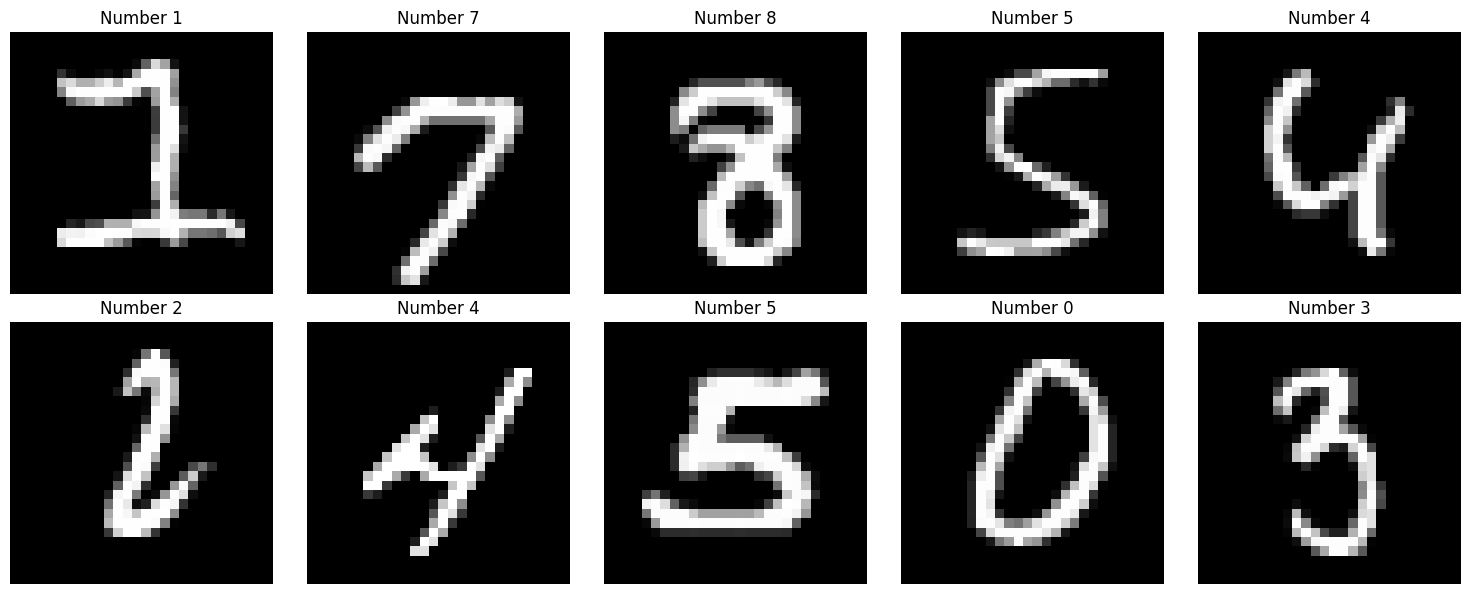

In [289]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
ax = ax.flatten()

for i in range(len(ax)):
    index = np.random.randint(0,785)
    number = df.iloc[index]['label']
    pixels = df.iloc[index].drop('label')
    ax[i].imshow(pixels.values.reshape(28,28), cmap='grey')
    ax[i].set_title(f'Number {number}')
    ax[i].axis('off')

plt.tight_layout()

In [290]:
import seaborn as sns

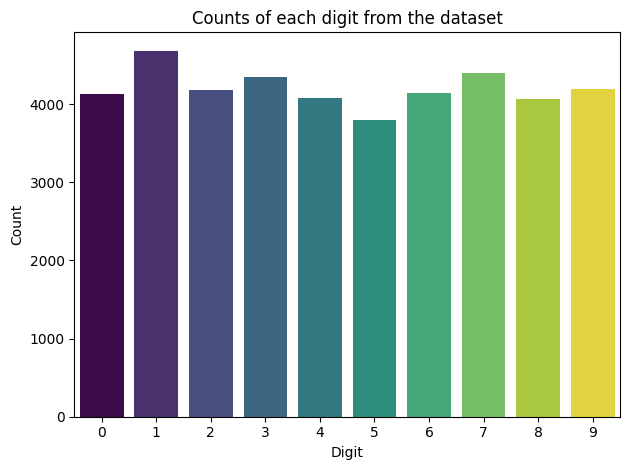

In [413]:
sns.countplot(data=df, x='label', palette='viridis', hue='label')
plt.title('Counts of each digit from the dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.legend([],[], frameon=False)
plt.tight_layout()

The dataset does not exhibit severe imbalance. While there may be some variations in the distribution of classes, the extent of this imbalance is relatively minor. 

### Logistic Regression

Set target and features

In [353]:
y = df['label']
X = df.drop(columns='label')

In [354]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [356]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('logit_clf', LogisticRegression(solver='lbfgs', max_iter=1000))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logit_clf', LogisticRegression(max_iter=1000))])

In [357]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is {accuracy:0.4}')

The accuracy is 0.9077


Now, we are going to test some digits that I have handwritten. This will allow us to evaluate the model's performance on real-world data and see how well it recognizes my handwriting. By doing this, we can identify any specific areas where the model might struggle, and explore ways to improve its accuracy, testing various handwriting styles.

In [367]:
from cvt_jpg2csv_greyscale import convert_image_to_csv, csv2dataframe_clf

In [384]:
for i in range(10):
    convert_image_to_csv('img/num'+str(i)+'.png', 'img/num'+str(i)+'.csv')

Conversion complete! CSV file saved as img/num0.csv
Conversion complete! CSV file saved as img/num1.csv
Conversion complete! CSV file saved as img/num2.csv
Conversion complete! CSV file saved as img/num3.csv
Conversion complete! CSV file saved as img/num4.csv
Conversion complete! CSV file saved as img/num5.csv
Conversion complete! CSV file saved as img/num6.csv
Conversion complete! CSV file saved as img/num7.csv
Conversion complete! CSV file saved as img/num8.csv
Conversion complete! CSV file saved as img/num9.csv


In [385]:
my_nums = pd.DataFrame(columns=df.columns)
for i in range(10):
    num_df = csv2dataframe_clf('img/num'+str(i)+'.csv', X.columns, i)
    my_nums = pd.concat([my_nums, num_df], ignore_index=True)

my_nums

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [386]:
my_nums_pred = clf.predict(my_nums.drop(columns='label'))
my_nums_accuracy = accuracy_score(my_nums['label'].to_list(), my_nums_pred)
print('The accuracy with my numbers is ' + str(my_nums_accuracy))

The accuracy with my numbers is 0.8


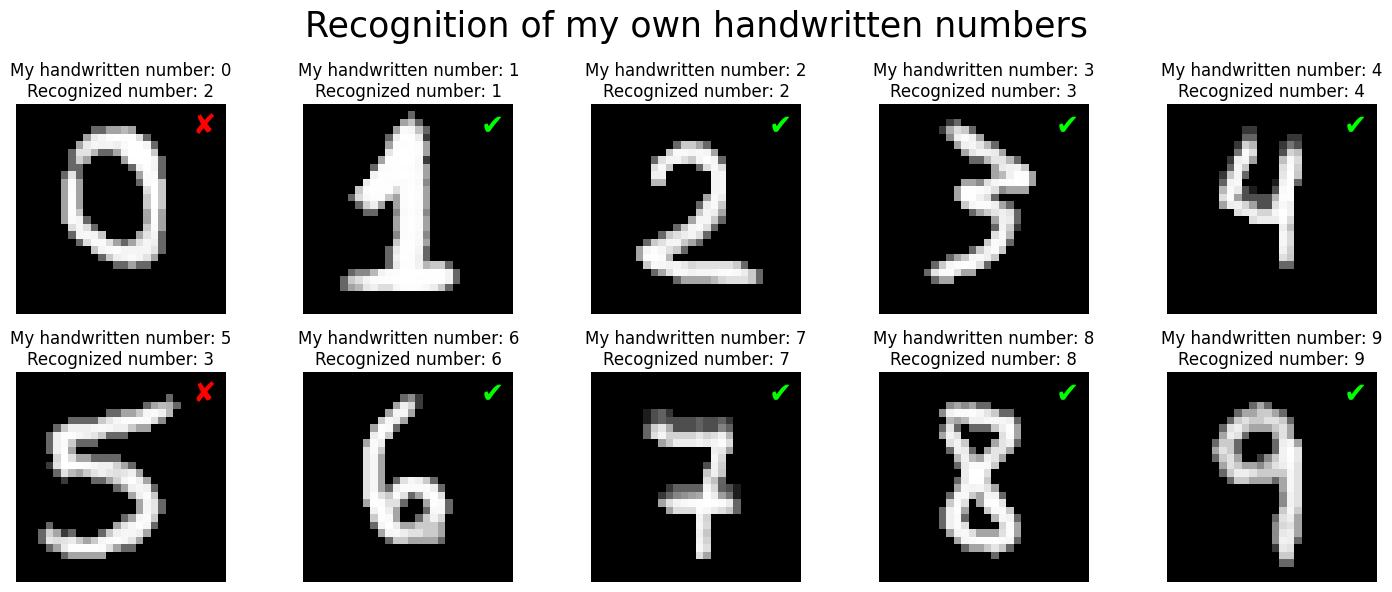

In [408]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    number = i
    pixels = my_nums.iloc[i].drop('label').astype('float')
    ax[i].imshow(pixels.values.reshape(28,28), cmap='grey')
    ax[i].set_title(f'My handwritten number: {number}\nRecognized number: {my_nums_pred[i]}')
    if number ==  my_nums_pred[i]:
        ax[i].text(0.9, 0.9, '✔', color='lime', fontsize=20, ha='center', va='center', transform=ax[i].transAxes)
    else:
        ax[i].text(0.9, 0.9, '✘', color='red', fontsize=20, ha='center', va='center', transform=ax[i].transAxes)
    ax[i].axis('off')

plt.suptitle('Recognition of my own handwritten numbers', fontsize=25)
plt.subplots_adjust(hspace=1)
plt.tight_layout()

In [389]:
from sklearn.metrics import confusion_matrix

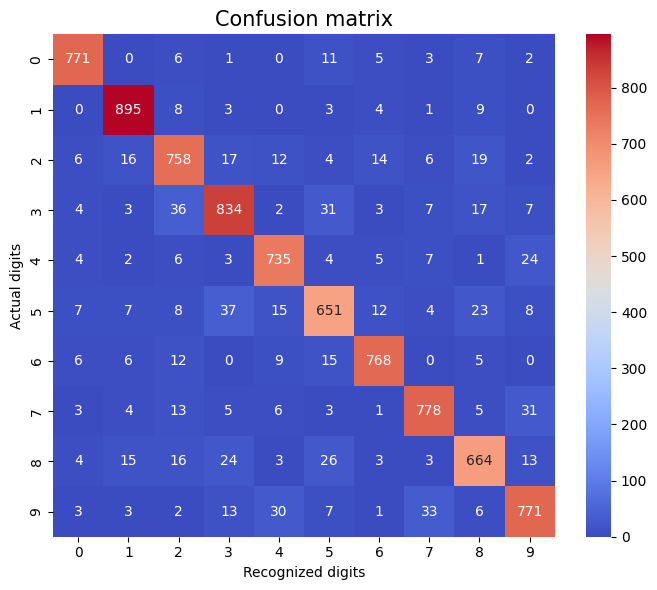

In [420]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='coolwarm')

plt.ylabel('Actual digits')
plt.xlabel('Recognized digits')
plt.title('Confusion matrix', fontsize=15)
plt.tight_layout()


It's interesting to see how the digit $5$ is the most frequently confused digit in the model's predictions, which is commonly mistaken for the digit $3$ (this aligns with the previous recognition of my own handwritten digits). Another digit that shows a high level of confusion is $8$. This observation could be due to the similar shapes of these digits, which makes it challenging for the model to distinguish between them accurately.